<p style="font: 30px Georgia; 
          text-decoration: underline; 
          text-align:center; 
          padding:20px; 
          background-color:PapayaWhip "> 
    ANALYSIS & PREDICTION OF COVID CASES IN DELHI-NCR 
</p>

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    Importing The Required Libraries 
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    Exploratory Data Analysis 
</p>

In [2]:
# Load the dataset
dataset = pd.read_excel('Dataset.xlsx')

In [3]:
dataset.head(10)

,DATE,TEMPERATURE,HUMIDITY,AIR QUALITY INDEX,SENIOR CITIZEN (%),GENDER DIVERSITY (MALE : FEMALE) %,LABOUR / HAZARDOUS WORK (%),PRIOR MEDICAL HISTORY (%),PRIOR SURGICAL HISTORY (%),CARDOVASCULAR DISEASE (%),GASTRO-INTESTINAL DISEASE (%),SMOKING / ALCOHOL HABIT (%),ATHELETIC PERSON (%),NUMBER OF COVID-19 CASES
0,2020-04-01,24.4,59.4,90,6.477079,63.728738,15.645726,17.284708,5.028437,5.894751,4.321189,0.927448,3.088129,55
1,2020-04-02,24.5,52.8,77,11.347752,43.951476,15.416381,15.074936,5.416047,5.621577,3.171675,1.004137,2.934016,67
2,2020-04-03,23.6,44.2,93,3.596084,54.745846,29.511260,22.306964,8.483980,2.055124,4.565242,1.893967,2.422586,100
3,2020-04-04,24.5,45.7,102,10.640119,43.882067,17.925382,10.840782,18.420036,5.130626,6.898100,4.461548,5.000726,126
4,2020-04-05,25.9,48.7,117,4.231188,53.344369,16.799106,14.629100,6.025953,3.947801,4.112617,0.956788,2.478541,58
5,2020-04-06,28.2,44.6,122,9.725094,54.046790,15.285486,16.979693,6.020472,5.656211,5.824982,1.380862,4.295044,20
6,2020-04-07,26.6,46.7,94,9.965386,41.731963,14.402382,16.194867,6.097947,6.341363,3.136919,0.838687,4.921995,53
7,2020-04-08,26.4,40.6,101,4.895206,58.527256,10.331037,15.263409,9.518519,5.948537,5.545886,2.230241,4.257838,69
8,2020-04-09,25.6,41.9,101,6.337678,58.220827,14.574158,11.935973,5.733537,4.690100,5.498332,1.480095,2.064839,73
9,2020-04-10,27.9,39.0,127,6.618576,46.192873,17.133847,14.644490,7.645969,3.566767,5.387830,1.022348,4.942468,89


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   DATE                                1005 non-null   datetime64[ns]
 1   TEMPERATURE                         1005 non-null   float64       
 2   HUMIDITY                            1005 non-null   float64       
 3   AIR QUALITY INDEX                   1005 non-null   int64         
 4   SENIOR CITIZEN (%)                  1005 non-null   float64       
 5   GENDER DIVERSITY (MALE : FEMALE) %  1005 non-null   float64       
 6   LABOUR / HAZARDOUS WORK (%)         1005 non-null   float64       
 7   PRIOR MEDICAL HISTORY (%)           1005 non-null   float64       
 8   PRIOR SURGICAL HISTORY (%)          1005 non-null   float64       
 9   CARDOVASCULAR DISEASE (%)           1005 non-null   float64       
 10  GASTRO-INTESTINAL DISEAS

In [5]:
dataset.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE,1005,2021-08-16 00:00:00,2020-04-01 00:00:00,2020-12-08 00:00:00,2021-08-16 00:00:00,2022-04-24 00:00:00,2022-12-31 00:00:00,NaN
TEMPERATURE,1005.0,25.849055,9.1,19.4,28.2,31.2,38.2,7.137523
HUMIDITY,1005.0,64.983582,17.8,54.0,67.3,79.1,99.3,18.825937
AIR QUALITY INDEX,1005.0,161.052736,36.0,103.0,150.0,196.0,506.0,75.95206
SENIOR CITIZEN (%),1005.0,17.421021,3.020319,8.257075,12.078838,21.081536,73.827853,14.184095
GENDER DIVERSITY (MALE : FEMALE) %,1005.0,52.600158,40.033625,46.12564,52.358485,58.810137,64.973614,7.154723
LABOUR / HAZARDOUS WORK (%),1005.0,26.038373,10.008348,16.75195,23.191056,33.103086,64.785617,11.957418
PRIOR MEDICAL HISTORY (%),1005.0,22.929171,10.02746,15.707885,20.884848,28.78398,49.510189,8.972788
PRIOR SURGICAL HISTORY (%),1005.0,14.647627,5.015353,7.978687,13.96176,20.243863,39.55475,7.578072
CARDOVASCULAR DISEASE (%),1005.0,9.264043,2.040383,5.17357,9.350644,12.967354,19.980234,4.610279


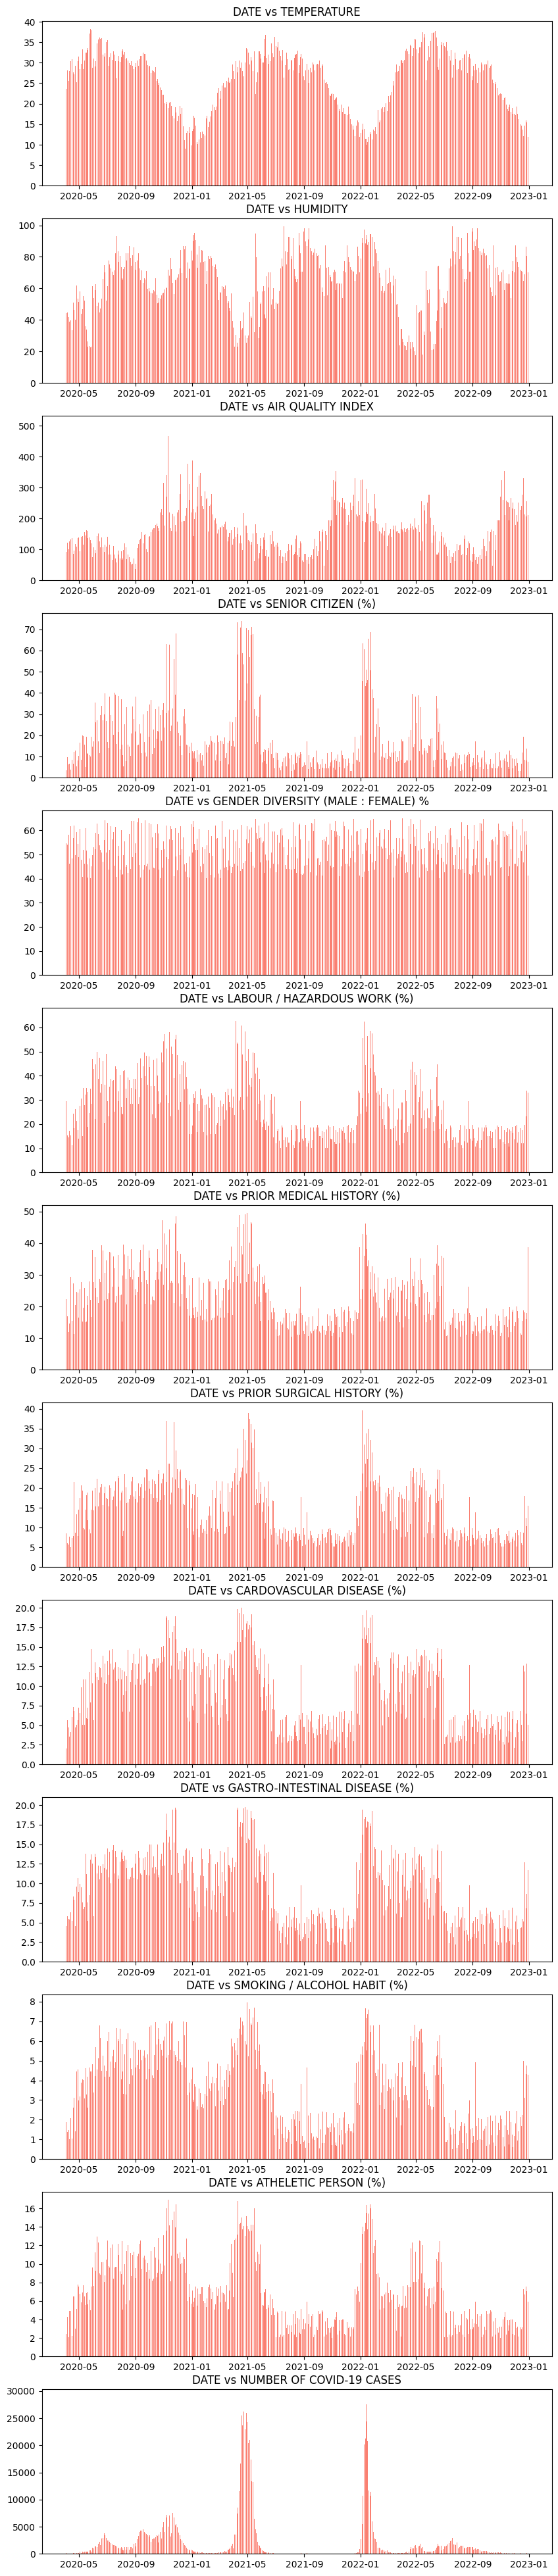

In [6]:
fig, ax = plt.subplots(13, 1, figsize=(10, 50))

for i in range(0, 13):
    ax[i].bar(dataset['DATE'], dataset[dataset.columns[i+1]], 0.6, color='Salmon')
    ax[i].set_title('DATE vs ' + dataset.columns[i+1])
plt.show()

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    Setting the Date Column as Index 
</p>

In [7]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])

In [8]:
dataset = dataset.set_index('DATE')

In [9]:
dataset

,TEMPERATURE,HUMIDITY,AIR QUALITY INDEX,SENIOR CITIZEN (%),GENDER DIVERSITY (MALE : FEMALE) %,LABOUR / HAZARDOUS WORK (%),PRIOR MEDICAL HISTORY (%),PRIOR SURGICAL HISTORY (%),CARDOVASCULAR DISEASE (%),GASTRO-INTESTINAL DISEASE (%),SMOKING / ALCOHOL HABIT (%),ATHELETIC PERSON (%),NUMBER OF COVID-19 CASES
DATE,,,,,,,,,,,,,
2020-04-01,24.4,59.4,90,6.477079,63.728738,15.645726,17.284708,5.028437,5.894751,4.321189,0.927448,3.088129,55
2020-04-02,24.5,52.8,77,11.347752,43.951476,15.416381,15.074936,5.416047,5.621577,3.171675,1.004137,2.934016,67
2020-04-03,23.6,44.2,93,3.596084,54.745846,29.511260,22.306964,8.483980,2.055124,4.565242,1.893967,2.422586,100
2020-04-04,24.5,45.7,102,10.640119,43.882067,17.925382,10.840782,18.420036,5.130626,6.898100,4.461548,5.000726,126
2020-04-05,25.9,48.7,117,4.231188,53.344369,16.799106,14.629100,6.025953,3.947801,4.112617,0.956788,2.478541,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,15.4,80.5,255,13.621955,54.128765,33.700707,17.847662,10.298190,12.830024,8.629336,4.757055,7.038198,112
2022-12-28,14.2,88.7,302,12.281469,55.780609,23.140746,17.211967,11.260085,9.350644,12.499625,4.760624,5.820231,64
2022-12-29,14.0,82.9,189,11.979534,60.401861,21.648867,26.502305,20.254757,13.342836,12.782398,2.903467,5.583834,128


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    Performing seasonal decomposition 
</p>

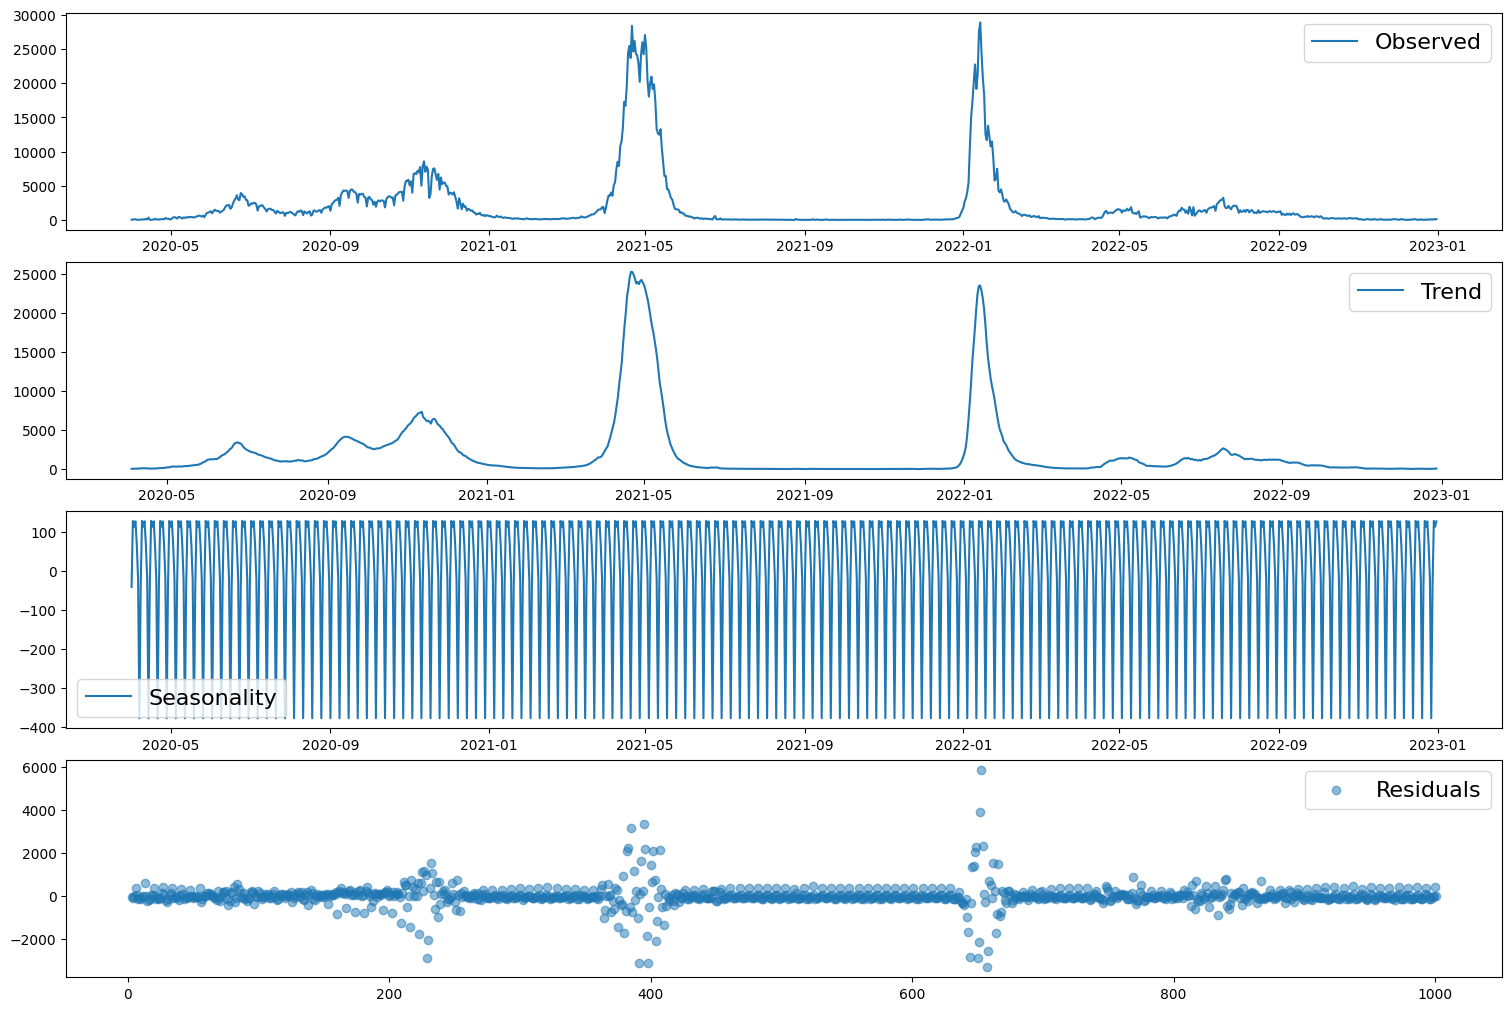

In [10]:
decomposition = seasonal_decompose(dataset['NUMBER OF COVID-19 CASES'], model='additive')


fig, ax = plt.subplots(4, figsize=(15,10), constrained_layout = True)

ax[0].plot(decomposition.observed, label='Observed')
ax[0].legend(loc='best', fontsize=16)

ax[1].plot(decomposition.trend, label='Trend')
ax[1].legend(loc='best', fontsize=16)

ax[2].plot(decomposition.seasonal, label='Seasonality')
ax[2].legend(loc='best', fontsize=16)

ax[3].scatter(y=decomposition.resid, x=range(len(decomposition.resid)), alpha=0.5, label='Residuals')
ax[3].legend(loc='best', fontsize=16)

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    Splitting the Data for Training and Testing
</p>

In [11]:
X = dataset.drop('NUMBER OF COVID-19 CASES', axis=1)
Y = dataset['NUMBER OF COVID-19 CASES']

In [12]:
# taking 120 days as testing data
x_train, x_test = X.iloc[:,:].values, X.iloc[-200:-80,:].values
y_train, y_test = Y.iloc[:].values, Y.iloc[-200:-80].values

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    Standardization - Scaling the Data
</p>

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    Dimensionality reduction
</p>

In [14]:
pca = PCA(n_components=12)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    Random Forest Model
</p>

In [15]:
rf = RandomForestRegressor(n_estimators=50, random_state=40)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [16]:
mae = np.round(mean_absolute_error(y_test, y_pred), 3)
mse = np.round(mean_squared_error(y_test, y_pred), 3)
r2 = np.round(r2_score(y_test, y_pred), 3)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 score:', r2)

Mean Absolute Error: 261.504
Mean Squared Error: 116770.134
R2 score: 0.693


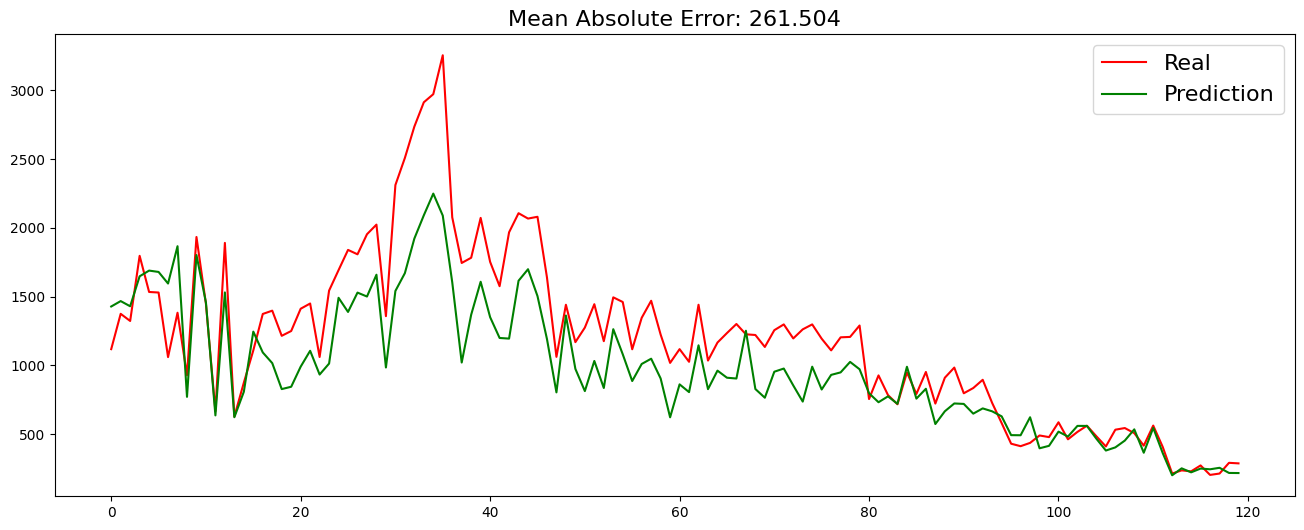

In [17]:
# Plotting Reality Vs Prediction of the testing dataset
fig = plt.figure(figsize=(16,6))
plt.title(f'Mean Absolute Error: {mae}', fontsize=16)
plt.plot(y_test, color='red')
plt.plot(y_pred, color='green')
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.show()

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    Light Gradient Boosted Machine Model
</p>

In [18]:
lgbm = LGBMRegressor(random_state=100, num_leaves=100, learning_rate=0.01, n_estimators=2000, max_depth=100, min_child_samples=20, verbose=-1)
lgbm.fit(x_train, y_train)
y_pred = lgbm.predict(x_test)

In [19]:
mae = np.round(mean_absolute_error(y_test, y_pred), 3)
mse = np.round(mean_squared_error(y_test, y_pred), 3)
r2 = np.round(r2_score(y_test, y_pred), 3)


print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 score:', r2)

Mean Absolute Error: 100.858
Mean Squared Error: 17614.361
R2 score: 0.954


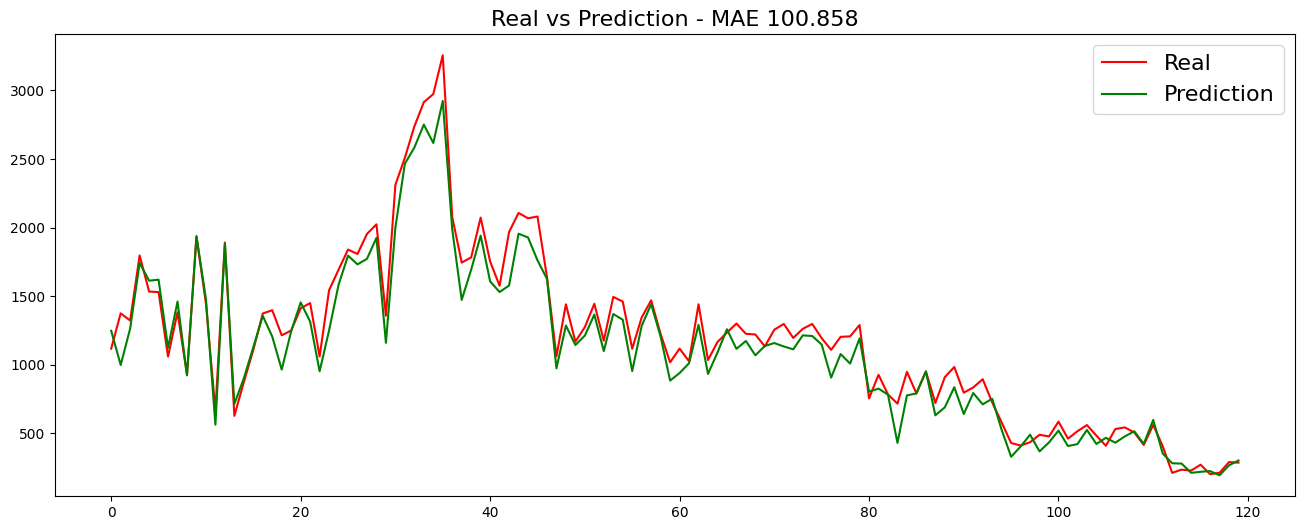

In [20]:
# Plotting Reality Vs Prediction of the testing dataset
fig = plt.figure(figsize=(16,6))
plt.title(f'Real vs Prediction - MAE {mae}', fontsize=16)
plt.plot(y_test, color='red')
plt.plot(y_pred, color='green')
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.show()

In [21]:
feature_value = lgbm.feature_importances_

In [22]:
feature_imp = pd.DataFrame(sorted(zip(feature_value,X.columns)), columns=['Value','Feature'])

In [23]:
feature_imp

,Value,Feature
0,2992,AIR QUALITY INDEX
1,4435,GENDER DIVERSITY (MALE : FEMALE) %
2,5346,SMOKING / ALCOHOL HABIT (%)
3,5398,PRIOR SURGICAL HISTORY (%)
4,5704,LABOUR / HAZARDOUS WORK (%)
5,6023,CARDOVASCULAR DISEASE (%)
6,6184,PRIOR MEDICAL HISTORY (%)
7,6411,ATHELETIC PERSON (%)
8,6722,SENIOR CITIZEN (%)
9,6734,GASTRO-INTESTINAL DISEASE (%)


In [25]:
plt.figure(figsize=(200, 60))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
sns.set(font_scale=10)
plt.show()

In [26]:
#saving the model

In [27]:
import pickle

In [30]:
pkl_filename = "D:\Covid Prediction/model_file.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lgbm, file)

In [31]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
score = pickle_model.score(x_test, y_test)
print(score)

0.9536262354784804
